In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 30 11:45:18 2020

@author: Rohit
"""

#Importing libraries


import pandas as pd
import numpy as np
import urllib
import json                 # Used to load data into JSON format
#from pprint import pprint   # pretty-print
from urllib.request import Request, urlopen
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo 
import plotly
import seaborn as sns;
import category_encoders as ce  # for encoding data
import copy 
import matplotlib.pyplot



In [2]:
# Fetching data from API

req = Request('https://api.rootnet.in/covid19-in/stats/history', headers={'User-Agent': 'Mozilla/5.0'})

webpage = urlopen(req).read()
json_data = json.loads(webpage)
#print(json_data)
intermid1=json_data['data']
intermid2=[]
data=[]
print(len(intermid1))
for i in range(len(intermid1)):
   
    
    
    intermid2=intermid1[i]
    intermid2['summary']['TotalconfirmedCasesIndian'] = intermid2['summary'].pop('confirmedCasesIndian')
    intermid2['summary']['TotalconfirmedCasesForeign'] = intermid2['summary'].pop('confirmedCasesForeign')
    intermid2['summary']['Totaldischarged'] = intermid2['summary'].pop('discharged')
    intermid2['summary']['Totaldeaths'] = intermid2['summary'].pop('deaths')
    for j in range(len(intermid2['regional'])):
        intermid3 = intermid2['regional']
        summary = intermid2['summary']
        date = intermid2['day']
        for k in range(len(intermid3[j])):
            intermid4=intermid3[j]
            for l in summary:
                intermid4[l]=summary.get(l)
                intermid4['date']=date
        data.append(intermid4)
        
df = pd.DataFrame(data)
df.rename(columns={'loc':'STUT'}, inplace=True)






234


In [14]:
df

,STUT,confirmedCasesIndian,confirmedCasesForeign,discharged,deaths,totalConfirmed,total,date,confirmedButLocationUnidentified,TotalconfirmedCasesIndian,TotalconfirmedCasesForeign,Totaldischarged,Totaldeaths
0,1,4,0,0,0,4,47,2020-03-10,0,31,16,0,0
1,2,0,14,0,0,14,47,2020-03-10,0,31,16,0,0
2,3,1,0,0,0,1,47,2020-03-10,0,31,16,0,0
3,4,9,0,0,0,9,47,2020-03-10,0,31,16,0,0
4,5,2,0,0,0,2,47,2020-03-10,0,31,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,9,235646,10,216353,1324,235656,8040203,2020-10-29,0,8040155,48,7315989,120527
7796,31,30566,0,28525,345,30566,8040203,2020-10-29,0,8040155,48,7315989,120527
7797,14,61260,1,56556,1009,61261,8040203,2020-10-29,0,8040155,48,7315989,120527
7798,12,476033,1,443589,6958,476034,8040203,2020-10-29,0,8040155,48,7315989,120527


In [4]:
df['STUT'].head(24)

0                 Delhi
1               Haryana
2             Karnataka
3                Kerala
4           Maharashtra
5                Punjab
6             Rajasthan
7            Tamil Nadu
8             Telengana
9     Jammu and Kashmir
10               Ladakh
11        Uttar Pradesh
12                Delhi
13              Haryana
14            Karnataka
15               Kerala
16          Maharashtra
17               Punjab
18            Rajasthan
19           Tamil Nadu
20            Telengana
21    Jammu and Kashmir
22               Ladakh
23        Uttar Pradesh
Name: STUT, dtype: object

In [5]:
# Encoding the states and union territories
ce_ordinal = ce.OrdinalEncoder(cols=['STUT'])
df=ce_ordinal.fit_transform(df)
df.head()

C:\Users\Rohit\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



,STUT,confirmedCasesIndian,confirmedCasesForeign,discharged,deaths,totalConfirmed,total,date,confirmedButLocationUnidentified,TotalconfirmedCasesIndian,TotalconfirmedCasesForeign,Totaldischarged,Totaldeaths
0,1,4,0,0,0,4,47,2020-03-10,0,31,16,0,0
1,2,0,14,0,0,14,47,2020-03-10,0,31,16,0,0
2,3,1,0,0,0,1,47,2020-03-10,0,31,16,0,0
3,4,9,0,0,0,9,47,2020-03-10,0,31,16,0,0
4,5,2,0,0,0,2,47,2020-03-10,0,31,16,0,0


In [6]:
# checking null values
df.isna().sum()

STUT                                0
confirmedCasesIndian                0
confirmedCasesForeign               0
discharged                          0
deaths                              0
totalConfirmed                      0
total                               0
date                                0
confirmedButLocationUnidentified    0
TotalconfirmedCasesIndian           0
TotalconfirmedCasesForeign          0
Totaldischarged                     0
Totaldeaths                         0
dtype: int64

In [7]:
# Fetching testing data from API

req2 = Request('https://api.rootnet.in/covid19-in/stats/testing/history', headers={'User-Agent': 'Mozilla/5.0'})

webpage2 = urlopen(req2).read()
json_data2 = json.loads(webpage2)['data']

df2 = pd.DataFrame(json_data2)
df2.rename(columns={'day':'date'}, inplace=True)




In [15]:
json_data2

[{'day': '2020-03-12',
  'totalSamplesTested': 6500,
  'totalIndividualsTested': 5900,
  'totalPositiveCases': 78,
  'source': 'Press_Release_ICMR_13March2020.pdf'},
 {'day': '2020-03-18',
  'totalSamplesTested': 13125,
  'totalIndividualsTested': 12235,
  'totalPositiveCases': 150,
  'source': 'ICMR_website_update_18March_6PM_IST.pdf'},
 {'day': '2020-03-19',
  'totalSamplesTested': 14175,
  'totalIndividualsTested': 13285,
  'totalPositiveCases': 182,
  'source': 'ICMR_website_update_19March_6PM_IST.pdf'},
 {'day': '2020-03-20',
  'totalSamplesTested': 15404,
  'totalIndividualsTested': 14514,
  'totalPositiveCases': 236,
  'source': 'ICMR_website_update_20March_6PM_IST.pdf'},
 {'day': '2020-03-21',
  'totalSamplesTested': 16911,
  'totalIndividualsTested': 16021,
  'totalPositiveCases': 315,
  'source': 'ICMR_website_update_21March_6PM_IST.pdf'},
 {'day': '2020-03-22',
  'totalSamplesTested': 18127,
  'totalIndividualsTested': 17237,
  'totalPositiveCases': 396,
  'source': 'ICMR_we

In [9]:
#display null values

df.isna().sum()

STUT                                0
confirmedCasesIndian                0
confirmedCasesForeign               0
discharged                          0
deaths                              0
totalConfirmed                      0
total                               0
date                                0
confirmedButLocationUnidentified    0
TotalconfirmedCasesIndian           0
TotalconfirmedCasesForeign          0
Totaldischarged                     0
Totaldeaths                         0
dtype: int64

In [10]:
# merging case and testing data based on date

df3 =  pd.merge(df, df2, on='date')
df3.head()


,STUT,confirmedCasesIndian,confirmedCasesForeign,discharged,deaths,totalConfirmed,total,date,confirmedButLocationUnidentified,TotalconfirmedCasesIndian,TotalconfirmedCasesForeign,Totaldischarged,Totaldeaths,totalSamplesTested,totalIndividualsTested,totalPositiveCases,source
0,1,6,0,0,0,6,73,2020-03-12,0,56,17,0,0,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
1,2,0,14,0,0,14,73,2020-03-12,0,56,17,0,0,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
2,3,4,0,0,0,4,73,2020-03-12,0,56,17,0,0,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
3,4,17,0,0,0,17,73,2020-03-12,0,56,17,0,0,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
4,5,11,0,0,0,11,73,2020-03-12,0,56,17,0,0,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf


In [11]:
df3.isna().sum()

STUT                                   0
confirmedCasesIndian                   0
confirmedCasesForeign                  0
discharged                             0
deaths                                 0
totalConfirmed                         0
total                                  0
date                                   0
confirmedButLocationUnidentified       0
TotalconfirmedCasesIndian              0
TotalconfirmedCasesForeign             0
Totaldischarged                        0
Totaldeaths                            0
totalSamplesTested                    92
totalIndividualsTested              6987
totalPositiveCases                  6782
source                                 0
dtype: int64

In [12]:
#Dropping tables with too many null values
df3 = df3.drop(['totalIndividualsTested','totalPositiveCases','source'],axis=1)


In [13]:
df3.isna().sum()

STUT                                 0
confirmedCasesIndian                 0
confirmedCasesForeign                0
discharged                           0
deaths                               0
totalConfirmed                       0
total                                0
date                                 0
confirmedButLocationUnidentified     0
TotalconfirmedCasesIndian            0
TotalconfirmedCasesForeign           0
Totaldischarged                      0
Totaldeaths                          0
totalSamplesTested                  92
dtype: int64

In [15]:
df4 = df3.copy()
df3['totalSamplesTested'][1]

6500.0

In [16]:
# replacing total samples tested with previous value wherever null
count=0
for i in range(df3['totalSamplesTested'].count()):
    if(np.isnan(df3['totalSamplesTested'][i])):
       df4['totalSamplesTested'][i]= df4['totalSamplesTested'][i-1]

C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
df4.isna().sum()


STUT                                0
confirmedCasesIndian                0
confirmedCasesForeign               0
discharged                          0
deaths                              0
totalConfirmed                      0
total                               0
date                                0
confirmedButLocationUnidentified    0
TotalconfirmedCasesIndian           0
TotalconfirmedCasesForeign          0
Totaldischarged                     0
Totaldeaths                         0
totalSamplesTested                  0
dtype: int64

<AxesSubplot:>

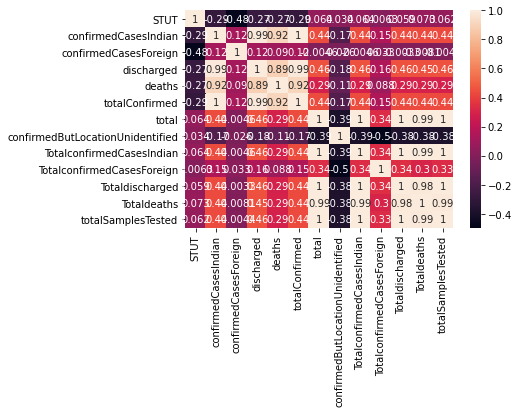

In [18]:
# plotting heatmap of correlation matrix to visualize the dependency of one attribute over another

heatmap = df3
heatmap = heatmap.drop(columns="date")
heatmap.head()
sns.heatmap(heatmap.corr(), annot = True)

In [19]:
# showing latest details

recent = intermid1[len(intermid1)-1]['regional']
recent  = pd.DataFrame(recent)

recent.rename(columns={'loc':'STUT'}, inplace=True)
recent.rename(columns={'totalConfirmed':'confirmed'}, inplace=True)

recent_x = recent.STUT



In [20]:
recent.style.background_gradient(cmap='plasma_r')

,STUT,confirmedCasesIndian,confirmedCasesForeign,discharged,deaths,confirmed,total,date,confirmedButLocationUnidentified,TotalconfirmedCasesIndian,TotalconfirmedCasesForeign,Totaldischarged,Totaldeaths
0,Andaman and Nicobar Islands,4253,0,3997,58,4253,7946429,2020-10-27,0,7946381,48,7201070,119502
1,Andhra Pradesh,808924,0,773548,6606,808924,7946429,2020-10-27,0,7946381,48,7201070,119502
2,Arunachal Pradesh,14391,0,12182,35,14391,7946429,2020-10-27,0,7946381,48,7201070,119502
3,Assam,204386,0,188587,908,204386,7946429,2020-10-27,0,7946381,48,7201070,119502
4,Bihar,212355,0,201942,1058,212355,7946429,2020-10-27,0,7946381,48,7201070,119502
5,Chandigarh,14085,0,13230,222,14085,7946429,2020-10-27,0,7946381,48,7201070,119502
6,Chhattisgarh,177608,0,153654,1861,177608,7946429,2020-10-27,0,7946381,48,7201070,119502
7,Dadra and Nagar Haveli and Daman and Diu,3228,0,3176,2,3228,7946429,2020-10-27,0,7946381,48,7201070,119502
8,Delhi,359487,1,327390,6312,359488,7946429,2020-10-27,0,7946381,48,7201070,119502
9,Goa,42531,1,39433,582,42532,7946429,2020-10-27,0,7946381,48,7201070,119502


### trace1 = {
  'x': recent_x,
  'y': recent.confirmed,
  'name': 'Confirmed',
  'type': 'bar'
};
trace2 = {
  'x': recent_x,
  'y': recent.discharged,
  'name': 'Discharged',
  'type': 'bar'
};

trace3 = {
  'x': recent_x,
  'y': recent.deaths,
  'name': 'Deaths',
  'type': 'bar'
};
data = [trace1, trace2,trace3];
layout = {
  'xaxis': {'title': ' State-Data '},
  'barmode': 'relative',
  'title': 'Case Wise Disturbution'
};

fig = go.Figure(data = data, layout = layout)
pyo.iplot(fig)





In [21]:
df4['date'] = list(map(lambda x: pd.to_datetime(x), df4['date']))


In [22]:
df4['date'][5000]

Timestamp('2020-08-17 00:00:00')

In [23]:
subdf = df4[df4['STUT']==19].copy()
subdf.reset_index(inplace = True, drop = True) 
subdf

,STUT,confirmedCasesIndian,confirmedCasesForeign,discharged,deaths,totalConfirmed,total,date,confirmedButLocationUnidentified,TotalconfirmedCasesIndian,TotalconfirmedCasesForeign,Totaldischarged,Totaldeaths,totalSamplesTested
0,19,1,0,0,0,1,173,2020-03-19,0,148,25,20,4,14175.0
1,19,1,0,0,0,1,223,2020-03-20,0,191,32,23,4,15404.0
2,19,1,0,0,0,1,283,2020-03-21,0,244,39,23,4,16911.0
3,19,5,0,0,0,5,360,2020-03-22,0,319,41,24,7,18127.0
4,19,6,0,0,0,6,467,2020-03-23,34,393,40,35,8,20707.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,19,13920,0,13009,214,13920,7814682,2020-10-23,0,7814634,48,7016046,117956,100113085.0
217,19,13920,0,13009,214,13920,7814682,2020-10-24,0,7814634,48,7016046,117956,101382564.0
218,19,13977,0,13087,216,13977,7864811,2020-10-25,0,7864763,48,7078123,118534,102523469.0
219,19,14038,0,13167,218,14038,7909959,2020-10-26,0,7909911,48,7137228,119014,103462778.0


In [24]:
subdf['newCases'] = subdf['confirmedCasesIndian']
subdf['newCases'][1]
subdf['newDeaths'] = subdf['Totaldeaths']

In [25]:

subwithnew = subdf.copy()

for i in range(1,len(subdf)):
    #print(subwithnew['newCases'][0])
    subwithnew['newCases'][i] = subdf['newCases'][i]- subdf['newCases'][i-1]
    subwithnew['newDeaths'][i] = subdf['newDeaths'][i]- subdf['newDeaths'][i-1]


C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
subwithnew['newDeaths']

0         4
1         0
2         0
3         3
4         1
       ... 
216    1340
217       0
218     578
219     480
220     488
Name: newDeaths, Length: 221, dtype: int64

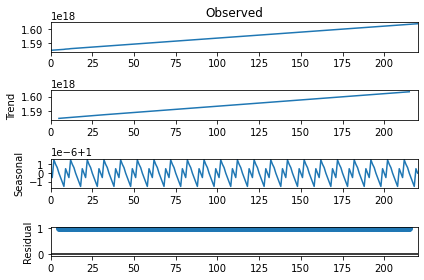

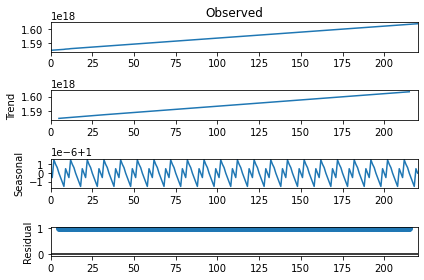

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(subwithnew['date'].values,period=10,  
                            model ='multiplicative') 
  
# ETS plot  
result.plot()

<AxesSubplot:xlabel='date'>

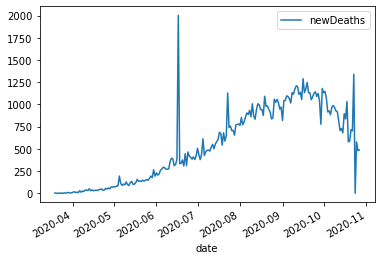

In [28]:
subwithnew.plot('date','newDeaths')


<AxesSubplot:xlabel='date'>

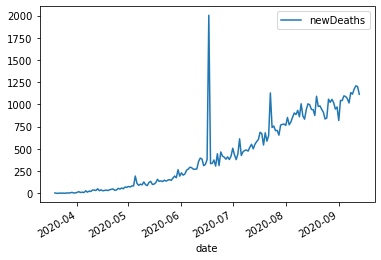

In [29]:
subwithnew=subwithnew.loc[:,['date','newDeaths']]
subwithnew=subwithnew[subwithnew['date']<'2020-9-14']
# index_no = subwithnew[(subwithnew['newDeaths']==0) & (subwithnew['date']>'2020-09-01')].index
# print(index_no)
# subwithnew.drop(index_no, inplace = True)
# subwithnew
subwithnew.plot('date','newDeaths')


In [30]:
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
    
# Fit auto_arima function to Covid dataset 
stepwise_fit = auto_arima(subwithnew['newDeaths'].astype(float), start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = False, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2257.977, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2352.504, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2309.170, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2255.991, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2350.695, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2257.976, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2265.400, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.842 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  177
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1124.995
Date:                Tue, 27 Oct 2020   AIC                           2255.991
Time:                        19:27:33   BIC                           2265.502
Sample:                             0   HQIC                          2259.849
                                - 177                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.6925      3.185      2.101      0.036       0.450      12.935
ma.L1         -0.8779      0.043    -20.569      0.000      -0.962      -0.794
sigma2       2.07e+04    695.172     29.779      0.000    1.93e+04    2.21e+04
===================================================================================
Ljung-Box (Q):                       20.71   Jarque-Bera (JB):             69071.49
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.02   Skew:                             8.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
    
# Fit auto_arima function to Covid dataset 
stepwise_fit = auto_arima(subwithnew['newDeaths'].astype(float), start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2232.844, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2198.302, Time=0.54 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2253.914, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2233.801, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2168.963, Time=1.27 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2172.185, Time=1.18 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=2168.447, Time=1.49 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=2199.106, Time=0.68 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.34 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=2168.2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  177
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood               -1073.351
Date:                             Thu, 22 Oct 2020   AIC                           2158.701
Time:                                     23:03:52   BIC                           2177.337
Sample:                                          0   HQIC                          2166.266
                                             - 177                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.3629     18.641      0.395      0.693     -29.173      43.899
ar.L1          0.9560      0.097      9.836      0.000       0.765       1.146
ma.L1         -0.8444      0.113     -7.490      0.000      -1.065      -0.623
ar.S.L12      -0.7000      0.031    -22.696      0.000      -0.760      -0.640
ar.S.L24      -0.4423      0.044    -10.006      0.000      -0.529      -0.356
sigma2      2.498e+04   1025.572     24.353      0.000     2.3e+04     2.7e+04
===================================================================================
Ljung-Box (Q):                       15.44   Jarque-Bera (JB):             38281.63
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.50   Skew:                             6.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        76.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
subwithnew

,date,newDeaths
0,2020-03-19,4
1,2020-03-20,0
2,2020-03-21,0
3,2020-03-22,3
4,2020-03-23,1
...,...,...
172,2020-09-09,1115
173,2020-09-10,1172
174,2020-09-11,1209
175,2020-09-12,1201


In [32]:
subwithnew.count()

date         177
newDeaths    177
dtype: int64

In [33]:
# Split data into train / test sets 
train = subwithnew.iloc[:len(subwithnew)-30] 
test = subwithnew.iloc[len(subwithnew)-30:] 
#train = subwithnew['newDeaths'].iloc[:len(subwithnew)-30].astype(float).values
#test = subwithnew['newDeaths'].iloc[len(subwithnew)-30:].astype(float).values

In [34]:
train

,date,newDeaths
0,2020-03-19,4
1,2020-03-20,0
2,2020-03-21,0
3,2020-03-22,3
4,2020-03-23,1
...,...,...
142,2020-08-10,1007
143,2020-08-11,871
144,2020-08-12,834
145,2020-08-13,942


                                      SARIMAX Results                                      
Dep. Variable:                           newDeaths   No. Observations:                  147
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood                -890.014
Date:                             Tue, 27 Oct 2020   AIC                           1790.028
Time:                                     19:27:40   BIC                           1804.554
Sample:                                          0   HQIC                          1795.931
                                             - 147                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001    727.206      0.000       0.997       1.003
ma.L1         -0.8909      

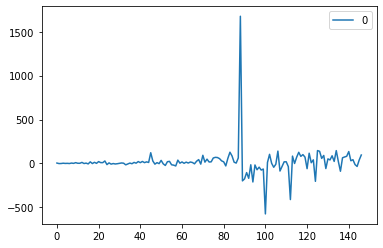

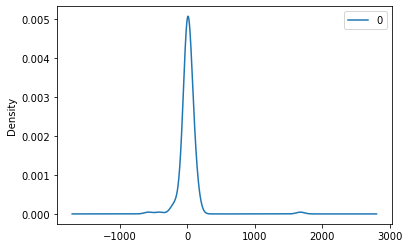

                 0
count   147.000000
mean     16.889134
std     161.980412
min    -575.512982
25%      -5.453810
50%       8.523810
75%      39.067649
max    1676.354084


In [35]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from matplotlib import pyplot
train = subwithnew.iloc[:len(subwithnew)-30] 
test = subwithnew.iloc[len(subwithnew)-30:] 

model = SARIMAX(train['newDeaths'].astype(float),order = (1, 0, 1),seasonal_order =(2, 1, 0, 12)) 
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=929.094163, expected=996.000000
predicted=1082.423024, expected=944.000000
predicted=1005.177126, expected=941.000000
predicted=995.224974, expected=876.000000
predicted=1000.600848, expected=1092.000000
predicted=1046.866352, expected=977.000000
predicted=1017.822722, expected=983.000000
predicted=1125.212624, expected=945.000000
predicted=1074.131028, expected=912.000000
predicted=997.276793, expected=836.000000
predicted=1079.696396, expected=848.000000
predicted=1050.998993, expected=1059.000000
predicted=1030.176410, expected=1023.000000
predicted=1322.459424, expected=1057.000000
predicted=1103.988550, expected=1021.000000
predicted=1044.181531, expected=948.000000
predicted=1130.955133, expected=971.000000
predicted=1018.368258, expected=819.000000
predicted=941.339351, expected=1045.000000
predicted=1039.927029, expected=1043.000000
predicted=989.057477, expected=1096.000000
predicted=983.143368, expected=1089.000000
predicted=1017.911631, expected=1065.000000
predict

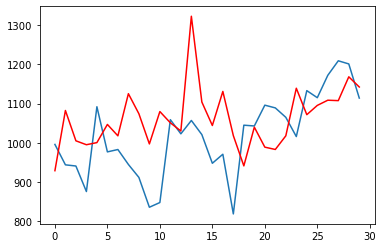

In [36]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from sklearn.metrics import mean_squared_error
 
#def parser(x):
#	return datetime.strptime('190'+x, '%Y-%m')
 
#series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
#X = series.values
#X = subwithnew['newDeaths'].astype(float).values
train = subwithnew['newDeaths'].iloc[:len(subwithnew)-30].astype(float).values
test = subwithnew['newDeaths'].iloc[len(subwithnew)-30:].astype(float).values
#size = int(len(X) * 0.66)
#train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = SARIMAX(history,order = (1, 0, 3),seasonal_order =(2, 1, 0, 12),enforce_stationarity=False)
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:            D.newDeaths   No. Observations:                  176
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1125.002
Method:                       css-mle   S.D. of innovations            143.873
Date:                Tue, 27 Oct 2020   AIC                           2256.004
Time:                        19:28:33   BIC                           2265.516
Sample:                             1   HQIC                          2259.862
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.6931      1.382      4.844      0.000       3.985       9.401
ma.L1.D.newDeaths    -0.8779      0.037    -23.583      0.000      -0.951      -0.805
                        

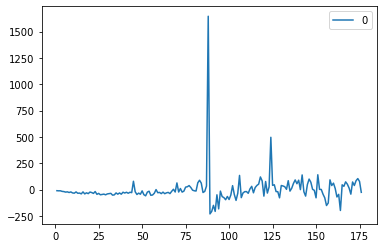

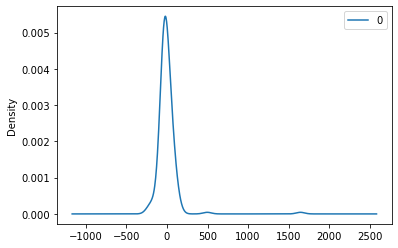

                 0
count   176.000000
mean     -1.309045
std     144.284636
min    -231.165707
25%     -40.821162
50%     -22.775555
75%      26.849503
max    1645.362833


In [37]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
#def parser(x):
#	return datetime.strptime('190'+x, '%Y-%m')
 
#series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# fit model
model = ARIMA(subwithnew['newDeaths'].astype(float),order = (0, 1, 1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=951.268195, expected=996.000000
predicted=962.036216, expected=944.000000
predicted=949.642499, expected=941.000000
predicted=968.093606, expected=876.000000
predicted=975.166805, expected=1092.000000
predicted=1004.081462, expected=977.000000
predicted=990.865510, expected=983.000000
predicted=991.730426, expected=945.000000
predicted=984.277622, expected=912.000000
predicted=995.594412, expected=836.000000
predicted=976.366000, expected=848.000000
predicted=938.691555, expected=1059.000000
predicted=956.303605, expected=1023.000000
predicted=959.017311, expected=1057.000000
predicted=974.011032, expected=1021.000000
predicted=988.936660, expected=948.000000
predicted=1018.057577, expected=971.000000
predicted=1033.971187, expected=819.000000
predicted=992.073577, expected=1045.000000
predicted=1003.329236, expected=1043.000000
predicted=995.894417, expected=1096.000000
predicted=1013.993513, expected=1089.000000
predicted=1021.820140, expected=1065.000000
predicted=1051.453

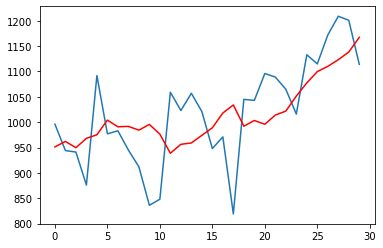

In [38]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
#def parser(x):
#	return datetime.strptime('190'+x, '%Y-%m')
 
#series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
#X = series.values
#X = subwithnew['newDeaths'].astype(float).values
train = subwithnew['newDeaths'].iloc[:len(subwithnew)-30].astype(float).values
test = subwithnew['newDeaths'].iloc[len(subwithnew)-30:].astype(float).values
#size = int(len(X) * 0.66)
#train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)

print('Test MSE: %.3f' % error)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [40]:
from fbprophet import Prophet
m = Prophet()
train = subwithnew.iloc[:len(subwithnew)-30] 
test = subwithnew.iloc[len(subwithnew)-30:] 
train.rename(columns={'date':'ds'}, inplace=True)
train.rename(columns={'newDeaths':'y'}, inplace=True)
test.rename(columns={'date':'ds'}, inplace=True)
test.rename(columns={'newDeaths':'y'}, inplace=True)


In [41]:
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
future = m.make_future_dataframe(periods=30)
future

,ds
0,2020-03-19
1,2020-03-20
2,2020-03-21
3,2020-03-22
4,2020-03-23
...,...
172,2020-09-09
173,2020-09-10
174,2020-09-11
175,2020-09-12


In [43]:
test.tail(30)

,ds,y
147,2020-08-15,996
148,2020-08-16,944
149,2020-08-17,941
150,2020-08-18,876
151,2020-08-19,1092
152,2020-08-20,977
153,2020-08-21,983
154,2020-08-22,945
155,2020-08-23,912
156,2020-08-24,836


In [44]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
147,2020-08-15,878.993631,694.047802,1051.490929
148,2020-08-16,878.730606,694.498091,1071.671754
149,2020-08-17,889.258944,705.853056,1076.197960
150,2020-08-18,882.063962,698.682010,1083.917512
151,2020-08-19,988.089046,789.801604,1157.124493
152,2020-08-20,943.510032,759.008029,1123.979434
153,2020-08-21,932.595337,749.314016,1111.375318
154,2020-08-22,938.467938,759.452126,1128.122218
155,2020-08-23,938.204913,754.176858,1122.937971
156,2020-08-24,948.733252,755.980641,1127.086873


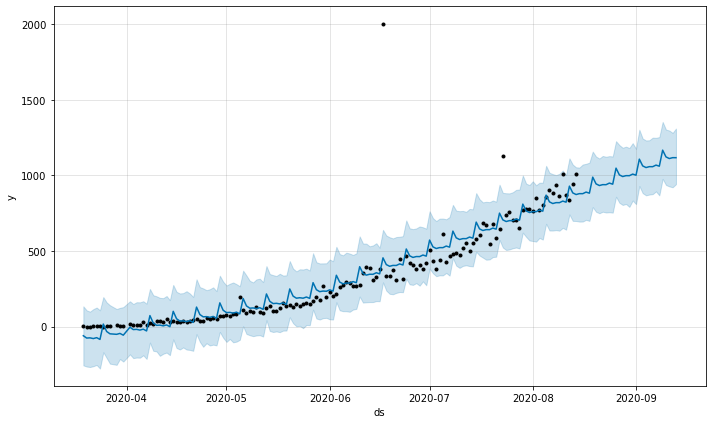

In [45]:
fig1 = m.plot(forecast)


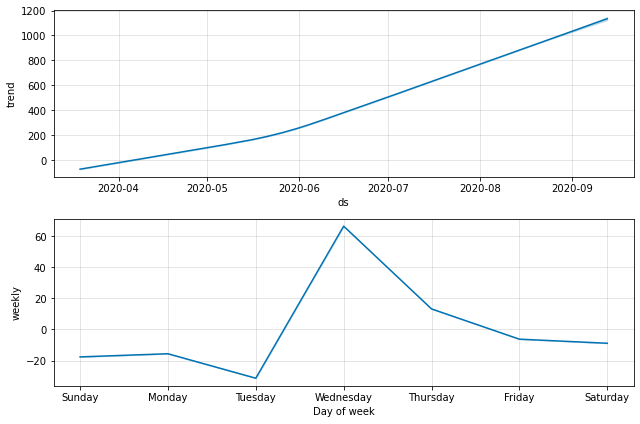

In [46]:
fig2 = m.plot_components(forecast)


In [47]:
forecast['yhat'].iloc[len(subwithnew)-30:]

147     878.993631
148     878.730606
149     889.258944
150     882.063962
151     988.089046
152     943.510032
153     932.595337
154     938.467938
155     938.204913
156     948.733252
157     941.538269
158    1047.563353
159    1002.984339
160     992.069644
161     997.942245
162     997.679220
163    1008.207559
164    1001.012576
165    1107.037660
166    1062.458646
167    1051.543951
168    1057.416552
169    1057.153527
170    1067.681866
171    1060.486883
172    1166.511967
173    1121.932954
174    1111.018258
175    1116.890859
176    1116.627834
Name: yhat, dtype: float64

In [48]:
from sklearn.metrics import mean_squared_error
train = subwithnew.iloc[:len(subwithnew)-30] 
test = subwithnew.iloc[len(subwithnew)-30:]
mse_score = mean_squared_error(test['newDeaths'],forecast['yhat'].iloc[len(subwithnew)-30:])


In [49]:
print(mse_score)

4553.518399121658
